In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

In [69]:
def read_dir(board, dataset):
    results = {}
    dir = Path('../measurements') / board
    for subdir in dir.iterdir():
        with open(subdir / f'{dataset}_feature.pkl', 'rb') as f:
            results[subdir.stem] = pickle.load(f)
    return results

def convert_to_fps(results, n_queries):
    print(results)
    for res, a in results.items():
        for method, b in a.items():
            for segment, value in b.items():
                results[res][method][segment] = n_queries / value
    return results

def boxplots(results, dataset):
    fig, ax = plt.subplots(figsize=(10, 6))
    n_boxes = len(results)
    bars = [
        ax.bar(x, results[res]['lightglue']['feature_extraction'], width = 1, label=res) for x, res in enumerate(sorted(results.keys(), reverse=True))
    ]

    for barss in bars:
        for bar in barss:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')
    ax.set_xlabel('SuperPoint')
    ax.set_ylabel('Throughput (fps)')
    ax.set_title('Orange Pi 5')

    ax.legend()
    plt.tight_layout()
    plt.show()

{'300': {'lightglue': {'feature_extraction': 51.62646395503543}}, '400': {'lightglue': {'feature_extraction': 94.17794652702287}}, '800': {'lightglue': {'feature_extraction': 653.7124655100051}}, '200': {'lightglue': {'feature_extraction': 28.35307671991177}}, '600': {'lightglue': {'feature_extraction': 252.75877668894827}}}


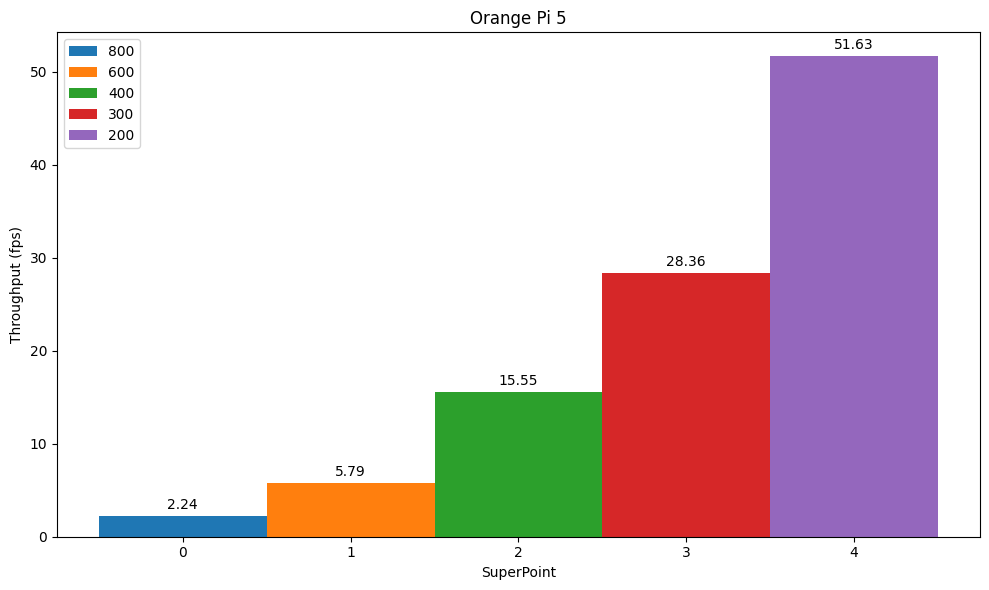

In [70]:
results = read_dir('rknn', 'st_lucia')
results = convert_to_fps(results, 1464)
boxplots(results, 'st_lucia')